### 降维技术

对数据进行简化降维的原因：

- 使得数据更易使用
- 使得数据更易可视化
- 降低很多算法的开销
- 去除噪声
- 使得结果易懂

数据降维方法主要有三种：

- **主成分分析(Principal Component Analysis, PCA)**  
在PCA中，数据从原来的坐标系转换到了新的坐标系，新坐标系的选择由原始数据本身决定。第一个新坐标轴选择的是原始数据中方差最大的方向，第二个新坐标轴的选择是和第一个坐标轴正交而且具有最大方差的方向。此过程一直反复，重复次数为原始数据中的特征数目。  
大部分方差都包含在最前面的几个新坐标轴中。  
- **因子分析(Factor Analysis)**  
在因子分析中，假设在观察数据的生成中有一些观察不到的隐变量(latent variable)。假设观察数据是这些**隐变量和某些噪声**的线性组合。那么隐变量的数据可能比观察数据的数目少，即通过找到隐变量就可以实现数据降维。  
- **独立成分分析(Independent Component Analysis, ICA)**  
ICA假设数据是从N个数据源生成的，这一点和因子分析有些类似。假设数据为多个数据源的混合观察结果，这些数据源之间在统计上是**相互独立**的，而在PCA中**只假设数据是不相关**的。同因子分析一样，数据源数目少于观察数据数目时，即可实现降维。

### PCA

将数据转换成前N个主成分的PCA伪代码如下：

    去除平均值
    计算协方差矩阵
    计算协方差矩阵的特征值和特征向量
    将特征值从大到小排序
    保留最上面的N个特征向量
    将数据转换到上述N个特征向量构建的空间中
    

In [1]:
import pca

In [2]:
import numpy as np

In [3]:
dataMat = pca.loadDataSet('testSet.txt')

In [4]:
lowDMat, reconMat = pca.pca(dataMat, 1)

In [5]:
np.shape(lowDMat)

(1000, 1)

In [6]:
import matplotlib.pyplot as plt

In [7]:
fig = plt.figure()

In [8]:
ax = fig.add_subplot(111)

In [9]:
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=20)

In [10]:
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=10, c='red')

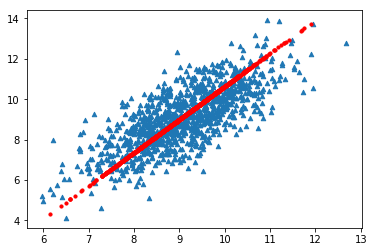

In [11]:
plt.show()

In [12]:
lowDMat, reconMat = pca.pca(dataMat, 2)

In [13]:
fig = plt.figure()

In [14]:
ax = fig.add_subplot(111)

In [15]:
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=20)

In [16]:
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=10, c='red')

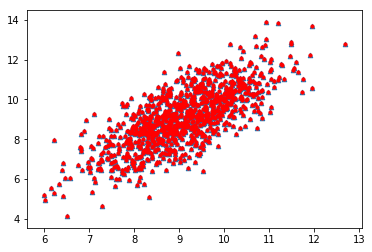

In [17]:
plt.show()

In [18]:
reload(pca)

<module 'pca' from 'pca.pyc'>

In [19]:
dataMat = pca.replaceNanWithMean()

In [20]:
meanVals = np.mean(dataMat, axis=0)

In [21]:
meanRemoved = dataMat - meanVals

In [22]:
covMat = np.cov(meanRemoved, rowvar=0)

In [23]:
print type(covMat)

<type 'numpy.ndarray'>


In [24]:
eigVals, eigVects = np.linalg.eig(np.mat(covMat))

In [25]:
eigVals

array([  5.34151979e+07,   2.17466719e+07,   8.24837662e+06,
         2.07388086e+06,   1.31540439e+06,   4.67693557e+05,
         2.90863555e+05,   2.83668601e+05,   2.37155830e+05,
         2.08513836e+05,   1.96098849e+05,   1.86856549e+05,
         1.52422354e+05,   1.13215032e+05,   1.08493848e+05,
         1.02849533e+05,   1.00166164e+05,   8.33473762e+04,
         8.15850591e+04,   7.76560524e+04,   6.66060410e+04,
         6.52620058e+04,   5.96776503e+04,   5.16269933e+04,
         5.03324580e+04,   4.54661746e+04,   4.41914029e+04,
         4.15532551e+04,   3.55294040e+04,   3.31436743e+04,
         2.67385181e+04,   1.47123429e+04,   1.44089194e+04,
         1.09321187e+04,   1.04841308e+04,   9.48876548e+03,
         8.34665462e+03,   7.22765535e+03,   5.34196392e+03,
         4.95614671e+03,   4.23060022e+03,   4.10673182e+03,
         3.41199406e+03,   3.24193522e+03,   2.74523635e+03,
         2.35027999e+03,   2.16835314e+03,   1.86414157e+03,
         1.76741826e+03,